### Forecasting 2010 Eurovision scores

#### 3 ideas:
- Based on weight matrix
- Forcast every country vote for every country
- Based on sum of all points given to a country so far

Libraries used:

numpy==1.22.3 <br />
pandas==1.4.2 <br />
pmdarima==1.8.5 <br />
statsmodels==0.13.2 <br />


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
INPUT_PATH = './'
file = 'eurovision_song_contest_1975_2019.xlsx'

data = pd.read_excel(os.path.join(INPUT_PATH, file))
data.head()

,Year,(semi-) final,Edition,Jury or Televoting,From country,To country,Points,Duplicate
0,1975,f,1975f,J,Belgium,Belgium,0,x
1,1975,f,1975f,J,Belgium,Finland,0,NaN
2,1975,f,1975f,J,Belgium,France,2,NaN
3,1975,f,1975f,J,Belgium,Germany,0,NaN
4,1975,f,1975f,J,Belgium,Ireland,12,NaN


In [3]:
data.tail()

,Year,(semi-) final,Edition,Jury or Televoting,From country,To country,Points,Duplicate
49827,2019,f,2019f,J,Belarus,Greece,0,NaN
49828,2019,f,2019f,J,Belarus,Germany,8,NaN
49829,2019,f,2019f,J,Belarus,Belarus,0,x
49830,2019,f,2019f,J,Belarus,The Netherlands,0,NaN
49831,2019,f,2019f,J,Belarus,Russia,0,NaN


### Check spaces in column names and remove them if necessary

In [4]:
data.columns

Index(['Year', '(semi-) final', 'Edition', 'Jury or Televoting',
       'From country', 'To country', 'Points      ', 'Duplicate'],
      dtype='object')

In [5]:
#data.columns = data.columns.str.replace(' ', '')

data.columns = data.columns.str.strip() # Strippping leading and trailing
print(data.columns)

Index(['Year', '(semi-) final', 'Edition', 'Jury or Televoting',
       'From country', 'To country', 'Points', 'Duplicate'],
      dtype='object')


In [6]:
data = data[data['Year'] <= 2009]

In [7]:
data.tail()

,Year,(semi-) final,Edition,Jury or Televoting,From country,To country,Points,Duplicate
24979,2009,sf2,2009sf2,J,Ukraine,Serbia,0,NaN
24980,2009,sf2,2009sf2,J,Ukraine,Slovakia,2,NaN
24981,2009,sf2,2009sf2,J,Ukraine,Slovenia,0,NaN
24982,2009,sf2,2009sf2,J,Ukraine,The Netherlands,0,NaN
24983,2009,sf2,2009sf2,J,Ukraine,Ukraine,0,x


### data info

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24984 entries, 0 to 24983
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                24984 non-null  int64 
 1   (semi-) final       24984 non-null  object
 2   Edition             24984 non-null  object
 3   Jury or Televoting  24984 non-null  object
 4   From country        24984 non-null  object
 5   To country          24984 non-null  object
 6   Points              24984 non-null  int64 
 7   Duplicate           945 non-null    object
dtypes: int64(2), object(6)
memory usage: 1.7+ MB


In [9]:
# cheking minimum - maximum values if they make sense, good way to scan for outliers
data.describe()

,Year,Points
count,24984.000000,24984.000000
mean,1997.827690,2.562920
std,10.028206,3.637076
min,1975.000000,0.000000
25%,1990.000000,0.000000
50%,2002.000000,0.000000
75%,2006.000000,5.000000
max,2009.000000,12.000000


In [10]:
# check country names
set(data['From country']) - set(data['To country'])

# this seams to be a missplelling, sot we need to correct that

set()

In [11]:
set(data['From country'])

{'Albania',
 'Andorra',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Belarus',
 'Belgium',
 'Bosnia & Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'F.Y.R. Macedonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Moldova',
 'Monaco',
 'Montenegro',
 'Morocco',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'San Marino',
 'Serbia',
 'Serbia & Montenegro',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'The Netherlands',
 'Turkey',
 'Ukraine',
 'United Kingdom',
 'Yugoslavia'}

In [12]:
data['From country'] = data['From country'].replace('The Netherands', 'The Netherlands')

In [13]:
# set(data['From country'])
set(data['From country']) - set(data['To country'])

set()

In [14]:
set(data['To country']) - set(data['From country'])

set()

In [15]:
len(data['To country']) == len(data['From country'])

True

In [16]:
# Drop Duplicate X rows

display(len(data))
data = data[(data.Duplicate != 'x')]
display(len(data))

24984

24039

In [17]:
# Using only the "final" information
data = data[data['(semi-) final'] == 'f']
data.drop('Duplicate', axis=1, inplace=True)

In [18]:
data.to_excel('eurovision_song_contest_1975_2010.xlsx', index=False, freeze_panes=(1,0))

# Working with the 1975-2009 data

### Check missing values

In [19]:
# data.isnull().sum()

In [20]:
data.isnull().sum()/len(data)*100

Year                  0.0
(semi-) final         0.0
Edition               0.0
Jury or Televoting    0.0
From country          0.0
To country            0.0
Points                0.0
dtype: float64

In [21]:
# data['From country'].value_counts()

In [22]:
# data['To country'].value_counts()

### Analysis

In [23]:
# Country that gets the most 12 points

df_12 = data[data['Points'] == 12][['Jury or Televoting', 'From country', 'To country', 'Points']]
df_12['To country'].value_counts().head()

Ireland           63
United Kingdom    61
Greece            45
France            43
Norway            43
Name: To country, dtype: int64

In [24]:
# Country that gets the most 0 points

df_0 = data[data['Points'] == 0][['Jury or Televoting', 'From country', 'To country', 'Points']]
df_0['To country'].value_counts().head()

Spain       495
Turkey      473
Finland     453
Portugal    441
Germany     434
Name: To country, dtype: int64

In [25]:
# which countries give the most 12 points to which countries

df_12_relationship = df_12.groupby(['From country', 'To country']).size().sort_values(ascending=False).reset_index(name='counts')
df_12_relationship

,From country,To country,counts
0,Cyprus,Greece,17
1,Greece,Cyprus,11
2,Belgium,United Kingdom,7
3,Spain,Germany,7
4,Austria,United Kingdom,7
...,...,...,...
475,Ireland,Slovenia,1
476,Ireland,Luxembourg,1
477,Ireland,Israel,1
478,Ireland,Iceland,1


In [26]:
df_12_relationship.to_excel('df_12_relationship.xlsx', index=False, freeze_panes=(1,0))

In [27]:
# which countries give the most 0 points to which countries

df_0_relationship = df_0.groupby(['From country', 'To country']).size().sort_values(ascending=False).reset_index(name='counts')
df_0_relationship

df_0_relationship.to_excel('df_0_relationship.xlsx', index=False, freeze_panes=(1,0))

In [28]:
# Average points by country

df_average_points_per_country = data.groupby('To country').agg({'Points': ['mean']}).sort_values(('Points', 'mean'))
df_average_points_per_country

,Points
,mean
To country,
Morocco,0.388889
Slovakia,0.600000
Lithuania,1.177966
F.Y.R. Macedonia,1.348416
Portugal,1.477165
Finland,1.619565
Slovenia,1.654618
Albania,1.679487


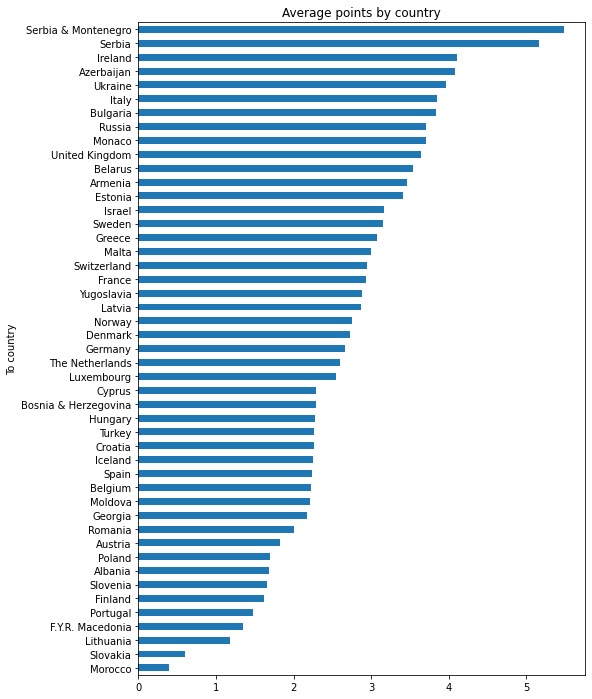

In [29]:
df_average_points_per_country.plot.barh(figsize=(8,12), title = "Average points by country", legend=False);

In [30]:
data['Jury or Televoting'].unique()

array(['J'], dtype=object)

In [31]:
data_all_jury = data[data['Jury or Televoting'] == 'J']
# data_all_tele = data[data['Jury or Televoting'] == 'T']

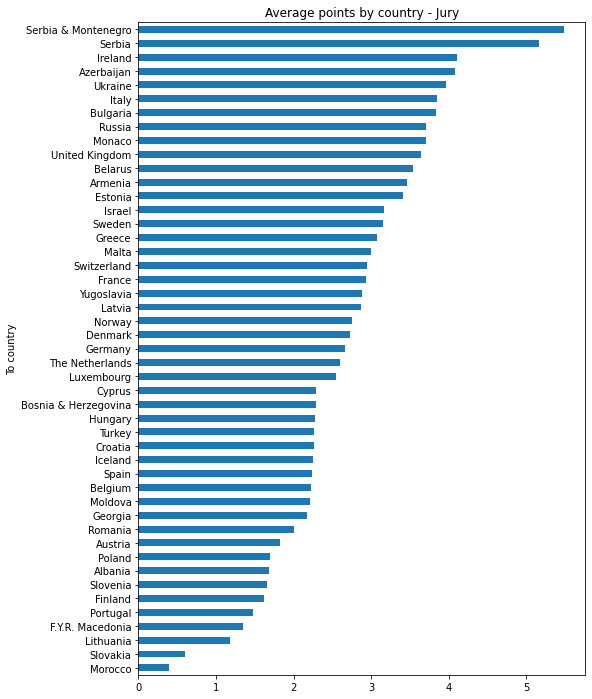

In [32]:
df_average_points_per_country_jury = data_all_jury.groupby('To country').agg({'Points': ['mean']}).sort_values(('Points', 'mean'))
df_average_points_per_country_jury.plot.barh(figsize=(8,12), title = "Average points by country - Jury", legend=False);

In [33]:
# df_average_points_per_country_tele = data_all_tele.groupby('To country').agg({'Points': ['mean']}).sort_values(('Points', 'mean'))
# df_average_points_per_country_tele.plot.barh(figsize=(8,12), title = "Average points by country - Jury", legend=False);

In [34]:
country_names = sorted(data['To country'].unique())
len(country_names)

47

In [35]:
data_forcast_2010 = data.groupby(['Year', 'To country']).sum().unstack(level=-1)

In [36]:
data_forcast_2010.head()

Points                                             \
To country Albania Armenia Austria Azerbaijan Belarus Belgium   
Year                                                            
1975           NaN     NaN     NaN        NaN     NaN    17.0   
1976           NaN     NaN    80.0        NaN     NaN    68.0   
1977           NaN     NaN    11.0        NaN     NaN    69.0   
1978           NaN     NaN    14.0        NaN     NaN   125.0   
1979           NaN     NaN     5.0        NaN     NaN     5.0   

                                                         ...           \
To country Bosnia & Herzegovina Bulgaria Croatia Cyprus  ... Slovakia   
Year                                                     ...            
1975                        NaN      NaN     NaN    NaN  ...      NaN   
1976                        NaN      NaN     NaN    NaN  ...      NaN   
1977                        NaN      NaN     NaN    NaN  ...      NaN   
1978                        NaN      NaN     NaN    NaN  ...      NaN   
1979                        NaN      NaN     NaN    NaN  ...      NaN   

                                                                              \
To country Slovenia  Spain Sweden Switzerland The Netherlands Turkey Ukraine   
Year                                                                           
1975            NaN   53.0   72.0        77.0           152.0    3.0     NaN   
1976            NaN   11.0    NaN        91.0            56.0    NaN     NaN   
1977            NaN   52.0    2.0        71.0            35.0    NaN     NaN   
1978            NaN   65.0   26.0        65.0            37.0    2.0     NaN   
1979            NaN  116.0    8.0        60.0            51.0    NaN     NaN   

                                      
To country United Kingdom Yugoslavia  
Year                                  
1975                138.0       22.0  
1976                164.0       10.0  
1977                121.0        NaN  
1978                 61.0        NaN  
1979                 73.0        NaN  

[5 rows x 47 columns]

In [37]:
# data_forcast_2010 = data.groupby(['Year', 'To country']).sum().unstack(level=1)

In [38]:
len(list(data_forcast_2010.columns))

47

In [39]:
data_forcast_2010.columns = data_forcast_2010.columns.get_level_values(0)

In [40]:
data_forcast_2010.columns = country_names

In [41]:
data_forcast_2010.head()

,Albania,Armenia,Austria,Azerbaijan,Belarus,Belgium,Bosnia & Herzegovina,Bulgaria,Croatia,Cyprus,...,Slovakia,Slovenia,Spain,Sweden,Switzerland,The Netherlands,Turkey,Ukraine,United Kingdom,Yugoslavia
Year,,,,,,,,,,,,,,,,,,,,,
1975,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,...,NaN,NaN,53.0,72.0,77.0,152.0,3.0,NaN,138.0,22.0
1976,NaN,NaN,80.0,NaN,NaN,68.0,NaN,NaN,NaN,NaN,...,NaN,NaN,11.0,NaN,91.0,56.0,NaN,NaN,164.0,10.0
1977,NaN,NaN,11.0,NaN,NaN,69.0,NaN,NaN,NaN,NaN,...,NaN,NaN,52.0,2.0,71.0,35.0,NaN,NaN,121.0,NaN
1978,NaN,NaN,14.0,NaN,NaN,125.0,NaN,NaN,NaN,NaN,...,NaN,NaN,65.0,26.0,65.0,37.0,2.0,NaN,61.0,NaN
1979,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,116.0,8.0,60.0,51.0,NaN,NaN,73.0,NaN


In [42]:
data_forcast_2010.to_excel('data_forcast_2010.xlsx', freeze_panes=(1,0))

In [43]:
# data_forcast_2010[['Sweden', 'France', 'Spain', 'Hungary', 'Ireland']].plot.line(figsize=(12,6)) 

In [44]:
# ax = data_forcast_2010.plot(figsize=(12,12))
# ax.legend(loc=3, bbox_to_anchor=(1.3,0.1));

In [45]:
# data_forcast_2010['Year'] = data_forcast_2010.index
#data_forcast_2010.reset_index(level=0, inplace=True)

In [46]:
# data_forcast_2010[data_forcast_2010.index == 2003]

In [47]:
# data_forcast_2010.isnull().sum()/len(data)*100

In [48]:
data_forcast_2010["Winner"] = np.where(data_forcast_2010.max(axis=1), data_forcast_2010.idxmax(axis=1), 0)

In [49]:
data_forcast_2010["Winner"]

Year
1975    The Netherlands
1976     United Kingdom
1977             France
1978             Israel
1979             Israel
1980            Ireland
1981     United Kingdom
1982            Germany
1983         Luxembourg
1984             Sweden
1985             Norway
1986            Belgium
1987            Ireland
1988        Switzerland
1989         Yugoslavia
1990              Italy
1991             France
1992            Ireland
1993            Ireland
1994            Ireland
1995             Norway
1996            Ireland
1997     United Kingdom
1998             Israel
1999             Sweden
2000            Denmark
2001            Estonia
2002             Latvia
2003             Turkey
2004            Ukraine
2005             Greece
2006            Finland
2007             Serbia
2008             Russia
2009             Norway
Name: Winner, dtype: object

<AxesSubplot:>

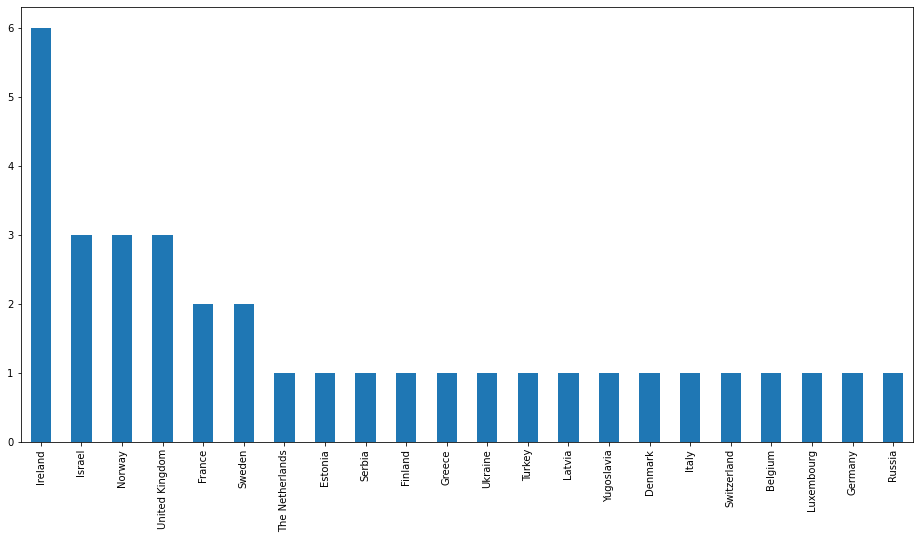

In [50]:
data_forcast_2010["Winner"].value_counts().plot(kind='bar', figsize=(16,8))

In [51]:
data_forcast_2010["Winner"].value_counts()

Ireland            6
Israel             3
Norway             3
United Kingdom     3
France             2
Sweden             2
The Netherlands    1
Estonia            1
Serbia             1
Finland            1
Greece             1
Ukraine            1
Turkey             1
Latvia             1
Yugoslavia         1
Denmark            1
Italy              1
Switzerland        1
Belgium            1
Luxembourg         1
Germany            1
Russia             1
Name: Winner, dtype: int64

<AxesSubplot:xlabel='Year'>

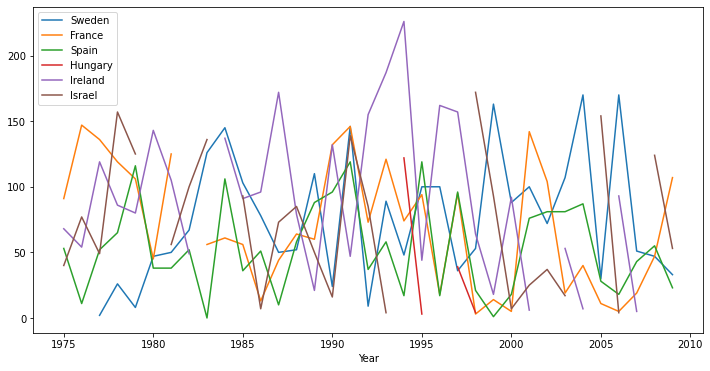

In [52]:
data_forcast_2010[['Sweden', 'France', 'Spain', 'Hungary', 'Ireland', 'Israel']].plot.line(figsize=(12,6)) 

In [53]:
data_mean_crosstable = data.groupby(['From country', 'To country'])['Points'].mean().unstack(level=-1)

In [54]:
# data_mean_crosstable

In [55]:
data_mean_crosstable.style.background_gradient(cmap='Blues').to_excel('data_mean_crosstable.xlsx')

In [56]:
data_mean_crosstable_sum = data_mean_crosstable.sum().to_frame()
data_mean_crosstable_sum.columns =['Sum of avg points']

In [57]:
data_mean_crosstable_sum = data_mean_crosstable_sum.sort_values('Sum of avg points', ascending=False)

<AxesSubplot:ylabel='To country'>

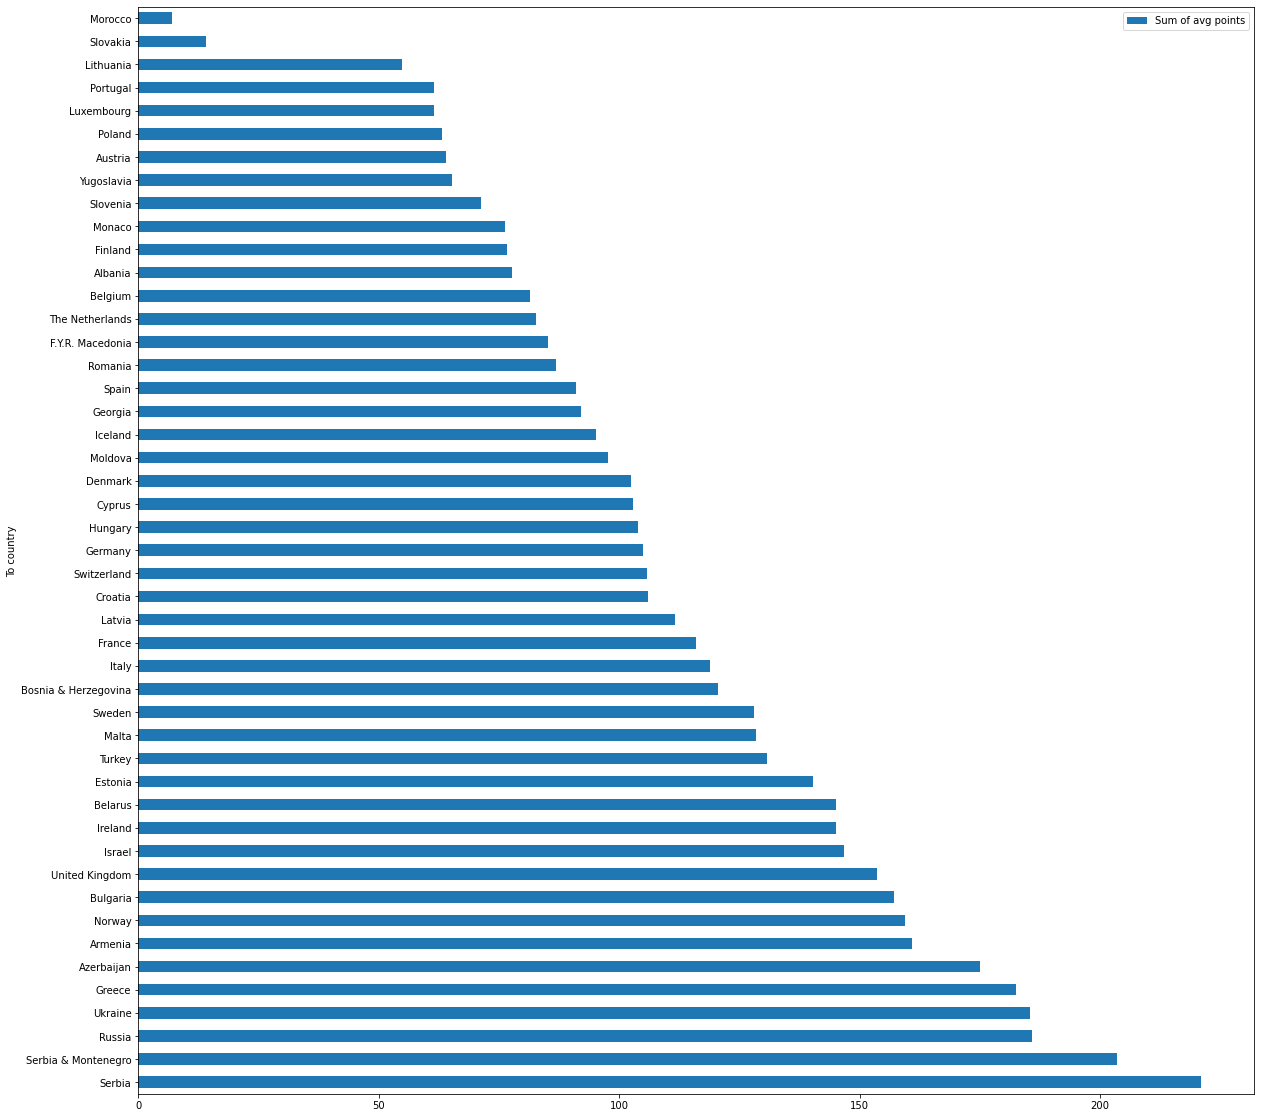

In [58]:
data_mean_crosstable_sum.plot.barh(figsize=(20,20))

In [59]:
data_mean_crosstable.nlargest(n=5, columns='Hungary')['Hungary']

From country
Serbia                 12.0
Andorra                 6.0
Serbia & Montenegro     6.0
Iceland                 5.8
Finland                 5.5
Name: Hungary, dtype: float64

In [60]:
data_mean_crosstable.nlargest(n=5, columns='Romania')['Romania']

From country
Moldova     11.000000
Spain        7.272727
Israel       5.600000
Portugal     4.333333
Cyprus       3.727273
Name: Romania, dtype: float64

In [61]:
data_mean_crosstable.nlargest(n=5, columns='Spain')['Spain']

From country
Andorra        10.000000
Morocco         5.000000
Italy           4.764706
Greece          4.724138
Switzerland     4.193548
Name: Spain, dtype: float64

Here we can see voting preferences between the countries, which data can be explained by political relationships and minority groups in each country. 
For example it's normal that Romania gets votes from Moldova and Spain, since Moldova's population consists of 7.0% Romanians and (according to residence permit data for 2011), more than 860,000 were Romanians live in Spain.

### Data prep for method 1

In [62]:
data_mean_crosstable.columns = list(data_mean_crosstable.columns)
data_mean_crosstable.reset_index(inplace=True)

In [63]:
data_mean_crosstable.head()

,From country,Albania,Armenia,Austria,Azerbaijan,Belarus,Belgium,Bosnia & Herzegovina,Bulgaria,Croatia,...,Slovakia,Slovenia,Spain,Sweden,Switzerland,The Netherlands,Turkey,Ukraine,United Kingdom,Yugoslavia
0,Albania,NaN,0.5,0.0,2.0,2.0,0.00,5.833333,0.0,0.400000,...,NaN,0.000,3.166667,3.000000,0.00,0.000000,8.833333,2.166667,1.333333,NaN
1,Andorra,0.0,0.0,0.0,3.5,0.0,1.00,0.000000,0.0,0.000000,...,NaN,0.000,10.000000,2.833333,0.50,0.000000,0.500000,5.500000,1.000000,NaN
2,Armenia,0.0,NaN,NaN,0.5,10.0,NaN,1.500000,4.0,0.666667,...,NaN,0.000,0.250000,1.500000,0.00,NaN,1.000000,6.000000,1.750000,NaN
3,Austria,4.0,5.0,NaN,NaN,0.0,1.44,5.000000,6.0,3.272727,...,0.0,0.625,2.137931,3.785714,3.75,2.652174,2.280000,2.000000,5.758621,2.0
4,Azerbaijan,0.5,0.0,NaN,NaN,NaN,NaN,2.500000,NaN,2.500000,...,NaN,NaN,0.000000,0.000000,NaN,NaN,12.000000,10.000000,0.000000,NaN


## Forecast Method 1 - Based on data_mean_crosstable -> treated as a weight matrix

This is a non-machine learning approach.

The idea is to use the data_mean_crosstable dataframe as a weight matrix, with the in with information on how many points on average each country gives to which country. This reflects voting preferences between countries, which depends on political and minority relations within countries. This weight matrix can be constructed using all data (1975-2009 period) or even over the past period (for example, the last 20 or 10 years). 

Ideally, it would be time to test this method to see which weight matrix constructed from the time window gives the most accurate estimate. As there is no time to do this, I will use the weight matrix for the whole period.

The algorithm is in steps:
- Select the list of countries that will be finalists in 2010
- for loop through the list of countries voted for
        - for loop through the list of voting countries
            - for a country, to collect all the votes (in a list) for a country in a dictionary
- sum up the average votes for a country
- select the country with the highest average vote -> this will be the winner

In [64]:
# define participating countries in final

participating_countries = ['Moldova', 'Russia', 'Estonia', 'Slovakia', 'Finland', 'Latvia', 'Serbia', 
                           'Bosnia & Herzegovina', 'Poland', 'Belgium', 'Malta', 'Albania', 'Greece', 'Portugal',
                           'F.Y.R. Macedonia', 'Belarus', 'Iceland', 'France', 'Germany', 'Spain']

# data = pd.read_excel("data_mean_crosstable.xlsx")


In [65]:
def predict_points(df, from_country, to_country, exclude_countries):
    """Predict points based on weight matrix. The idea is to summarize the
    average points recieved by each country, summarize it and store it in a
    dictionary.

    The winner will be the country with the highest summed up point.
    """
    country_dict = {}

    for country_t in to_country:
        points = []
        for country_f in from_country:

            if country_f != country_t:
                if country_t in exclude_countries:
                    break
                idx = df.index[df["From country"] == country_f].values[0]
                point = df.iloc[idx][country_t]
                # print("Country {} goves {} -> on average points of: {}".format(country_f, country_t, point))
                points.append(point)
        # if country_t not in country_dict:
        #     country_dict[country_t] = []

        points_np = np.array(points, dtype=np.float32)
        points_np = np.round(points_np)
        points_np[np.isnan(points_np)] = 0
        total_points = np.sum(points_np)
        country_dict[country_t] = total_points
    return country_dict

In [66]:
from_country = list(set(data['From country']))

In [67]:
from_country = list(set(data_mean_crosstable['From country']))
to_country = list(set(data_mean_crosstable.columns))
to_country.remove('From country')
    
from_country = [x for x in from_country if x in participating_countries] # keep only items that are in participating_countries list
to_country = [x for x in to_country if x in participating_countries] # keep only items that are in participating_countries list

exclude_countries = set(from_country) - set(to_country)
recieved_points_by_country = predict_points(data_mean_crosstable, from_country, to_country, exclude_countries)
    
winner, points = max(recieved_points_by_country, key=recieved_points_by_country.get), recieved_points_by_country.get(max(recieved_points_by_country, key=recieved_points_by_country.get))
    
print("Winner: {}, with total (predicted) points: {}".format(winner, points))

Winner: Serbia, with total (predicted) points: 85.0


In [68]:
# recieved_points_by_country

## Forecast Method 2 - Forcast every country vote for every country

The idea is to treat every vote from every country to every country as an individual dataset that needs forecasting. The advantage of this approach is that it's independent of every other aspect and only looks at how a country votes for a country in time.

Ideally, we would be able to select the best algorithm for this kind of task, and we could test it beforehand how it works on this kind of data. It's not clear what kind of forecasting algorithm is best for eurovision data.

Also note: normally, we would do a hypothesis test if the time series data is stationary or not.

The algorithm is in steps:
- Select the list of countries that will be finalists in 2010
- for loop through the list of countries voted for
        - for loop through the list of voting countries
        - reframe the data we analyze: not every country participates in every year, so there are missing point values, fill these years with 0
        - fit an Arima model on the data, forecast for 2010, store it in a dictionary 
- sum up the average votes for a country
- select the country with the highest average vote -> this will be the winner

In [69]:
data

,Year,(semi-) final,Edition,Jury or Televoting,From country,To country,Points
1,1975,f,1975f,J,Belgium,Finland,0
2,1975,f,1975f,J,Belgium,France,2
3,1975,f,1975f,J,Belgium,Germany,0
4,1975,f,1975f,J,Belgium,Ireland,12
5,1975,f,1975f,J,Belgium,Israel,1
...,...,...,...,...,...,...,...
24200,2009,f,2009f,J,United Kingdom,Russia,0
24201,2009,f,2009f,J,United Kingdom,Spain,0
24202,2009,f,2009f,J,United Kingdom,Sweden,0
24203,2009,f,2009f,J,United Kingdom,Turkey,12


In [70]:
data_play = data[data["From country"] == 'Spain'] # dummy dataframe to play around, to see what kind of model would be good to use
data_play = data_play[data_play["To country"] == 'United Kingdom']

In [71]:
data_play.head()

,Year,(semi-) final,Edition,Jury or Televoting,From country,To country,Points
245,1975,f,1975f,J,Spain,United Kingdom,10
611,1976,f,1976f,J,Spain,United Kingdom,12
936,1977,f,1977f,J,Spain,United Kingdom,3
1308,1978,f,1978f,J,Spain,United Kingdom,3
1693,1979,f,1979f,J,Spain,United Kingdom,5


In [72]:
data_play = data_play.groupby(data_play.index).mean()
data_play.head(10)

,Year,Points
245,1975.0,10.0
611,1976.0,12.0
936,1977.0,3.0
1308,1978.0,3.0
1693,1979.0,5.0
2035,1980.0,8.0
2409,1981.0,8.0
2745,1982.0,1.0
3133,1983.0,0.0
3500,1984.0,3.0


In [73]:
rng = np.arange(data_play.Year.min(), data_play.Year.max())
data_play = data_play.set_index('Year')
data_play = pd.merge(data_play, pd.Series(index=rng, name='rng'), how='outer', left_index=True, right_index=True).drop('rng', 1).fillna(0)
data_play

,Points
1975.0,10.0
1976.0,12.0
1977.0,3.0
1978.0,3.0
1979.0,5.0
1980.0,8.0
1981.0,8.0
1982.0,1.0
1983.0,0.0
1984.0,3.0


In [74]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [75]:
auto_arima(data_play,error_action='ignore').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   35
Model:               SARIMAX(3, 1, 0)   Log Likelihood                 -87.493
Date:                Sun, 01 May 2022   AIC                            182.985
Time:                        01:44:09   BIC                            189.091
Sample:                             0   HQIC                           185.067
                                 - 35                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3915      0.325     -1.205      0.228      -1.028       0.245
ar.L2         -0.5217      0.202     -2.583      0.010      -0.918      -0.126
ar.L3         -0.5518      0.207     -2.662      0.008      -0.958      -0.145
sigma2         9.6193      1.754      5.483      0.000       6.181      13.058
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                32.41
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.49   Skew:                             1.54
Prob(H) (two-sided):                  0.52   Kurtosis:                         6.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
def get_winner_from_dict(from_country_to_country_pred_dict):
    """Get values out of the nested dictionary. Return the winner country and
    the scores
    """
    recieved_points_by_country_dict = {}

    for country_f, values in from_country_to_country_pred_dict.items():
        for element in values:
            country, point_recieved = list(element.keys())[0], round(
                list(element.values())[0]
            )

            if country not in recieved_points_by_country_dict:
                recieved_points_by_country_dict[country] = []
            recieved_points_by_country_dict[country].append(point_recieved)
    sum_dict = {
        k: [sum(recieved_points_by_country_dict[k])]
        for k in recieved_points_by_country_dict.keys()
    }
    return max(sum_dict, key=sum_dict.get), sum_dict[max(sum_dict, key=sum_dict.get)][0]


def add2dict(d_c, k, v, pred):
    """Helper function to add values to the nested dictionary"""
    if k not in d_c:
        d_c[k] = []
    d_c[k].append({v: pred})


def predict_points(df, from_country, to_country):
    """Function to create a dictionary that summarizes predictions of points
    given by each country separately.

    The idea is that I build a model for each country's prediciton to every
    country. In a later part I select the country with the sum of the highest
    score

    Steps:
        - loop thorough the original dataframe for each From country and To country
        - create the dataframe with a subset of only two countries
        - create a forecasting model
        - store the predictions given in a nested dictionary
    """
    country_dict = {}

    for country_f in from_country:
        for country_t in to_country:

            if country_f != country_t:
                df_temp = df[df["From country"] == country_f]
                df_temp = df_temp[df_temp["To country"] == country_t]

                # if we have Jury and Televoting as well, we take the average
                df_temp = df_temp.groupby(df_temp.index).mean()

                # At least 10 rows should be used to predict
                if len(df_temp.index) > 5:
                    # check transform the Year column to index and fill missing
                    # years with 0
                    rng = np.arange(df_temp.Year.min(), df_temp.Year.max(), dtype=int)
                    # idx = pd.DatetimeIndex(rng)
                    
                    df_temp["Year"] = df_temp["Year"].astype(int)
                    df_temp = df_temp.set_index("Year")
                    df_temp = (
                        pd.merge(
                            df_temp,
                            pd.Series(index=rng, name="rng"),
                            how="outer",
                            left_index=True,
                            right_index=True,
                        )
                        .drop("rng", 1)
                        .fillna(df_temp['Points'].median())
                    )
                    df_temp.index = pd.to_datetime(df_temp.index , format="%Y")
                    # modelling part
                    # model = ARIMA(df_temp["Points"], order=(2, 0, 0))
                    # results = model.fit()
                    model = auto_arima(
                        df_temp, error_action="ignore", seasonal=False
                    )

                    # print('Getting predictions for: {}'.format(country_f))
                    # rng = pd.date_range(start=df_temp.index.min(), end=df_temp.index.max(), freq='A')

                    start_index = df_temp.index[-1].year
                    end_index = 2010
                    # prediction = results.predict(start=start_index, end=end_index).values[-1]
                    prediction = model.predict(end_index - start_index)[-1]
                    if prediction < 0:
                        prediction = 0
                    add2dict(country_dict, country_f, country_t, prediction)
    return country_dict

In [77]:
from_country = list(set(data["From country"]))
to_country = list(set(data["To country"]))

from_country = [x for x in from_country if x in participating_countries] # keep only items that are in participating_countries list
to_country = [x for x in to_country if x in participating_countries] # keep only items that are in participating_countries list

from_country_to_country_pred_dict = predict_points(data, from_country, to_country)
winner, points = get_winner_from_dict(from_country_to_country_pred_dict)

print("Winner: {}, with total (predicted) points: {}".format(winner, points))

Winner: Russia, with total (predicted) points: 66


## Forecast Method 3 - Based on sum of all points given to a country so far

The idea here is to use the information of the sum of point by every year to forecast. We fit a model for every country individually. Store the predicted score for 2010 into a dictionary and then get the country with the maximum predicted points.   

In [78]:
data_forcast_2010.to_excel('data_forcast_2010.xlsx')

In [79]:
data_forcast_2010.isnull().sum()/len(data)*100

Albania                 0.164894
Armenia                 0.164894
Austria                 0.042553
Azerbaijan              0.175532
Belarus                 0.180851
Belgium                 0.042553
Bosnia & Herzegovina    0.106383
Bulgaria                0.180851
Croatia                 0.101064
Cyprus                  0.063830
Denmark                 0.047872
Estonia                 0.132979
F.Y.R. Macedonia        0.148936
Finland                 0.037234
France                  0.005319
Georgia                 0.175532
Germany                 0.005319
Greece                  0.031915
Hungary                 0.154255
Iceland                 0.085106
Ireland                 0.026596
Israel                  0.037234
Italy                   0.095745
Latvia                  0.148936
Lithuania               0.143617
Luxembourg              0.085106
Malta                   0.090426
Moldova                 0.164894
Monaco                  0.159574
Morocco                 0.180851
Norway    

In [80]:
data_forcast_2010.head()

,Albania,Armenia,Austria,Azerbaijan,Belarus,Belgium,Bosnia & Herzegovina,Bulgaria,Croatia,Cyprus,...,Slovenia,Spain,Sweden,Switzerland,The Netherlands,Turkey,Ukraine,United Kingdom,Yugoslavia,Winner
Year,,,,,,,,,,,,,,,,,,,,,
1975,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,...,NaN,53.0,72.0,77.0,152.0,3.0,NaN,138.0,22.0,The Netherlands
1976,NaN,NaN,80.0,NaN,NaN,68.0,NaN,NaN,NaN,NaN,...,NaN,11.0,NaN,91.0,56.0,NaN,NaN,164.0,10.0,United Kingdom
1977,NaN,NaN,11.0,NaN,NaN,69.0,NaN,NaN,NaN,NaN,...,NaN,52.0,2.0,71.0,35.0,NaN,NaN,121.0,NaN,France
1978,NaN,NaN,14.0,NaN,NaN,125.0,NaN,NaN,NaN,NaN,...,NaN,65.0,26.0,65.0,37.0,2.0,NaN,61.0,NaN,Israel
1979,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,116.0,8.0,60.0,51.0,NaN,NaN,73.0,NaN,Israel


In [81]:
# data_forcast_2010.drop('Winner', axis=1, inplace=True)

In [82]:
data_forcast_2010 = data_forcast_2010.drop(columns=[col for col in data_forcast_2010 if col not in participating_countries])

In [83]:
set(data_forcast_2010.columns) - set(participating_countries)

set()

In [84]:
set(participating_countries) - set(data_forcast_2010.columns)

set()

In [85]:
def predict_points(df):
    """ As we have the data for the total recieved points for all of the
    countries, we can treat each country's total recieved points in time as a
    time series. We predict the recieved points in 2010, store the points for
    each country in a dictionary, then get back the maximum as the winner.
    """

    country_dict = {}

    for country in df.columns:
        df_temp = df[country]
        
        # df_temp.index = pd.to_datetime(df_temp.index, format='%Y')
        # df_temp = df_temp.set_index("Year")
        
        # Deal with missing values -> interpolate what we can, than drop the
        # rest of the values and we use the rest to predict. This is necessary,
        # because we have a lot of NaN values
        df_temp = df_temp.interpolate()
        df_temp = df_temp.dropna()

        model = auto_arima(df_temp, error_action="ignore", seasonal=False)
        start_index = int(df_temp.index[-1])
        end_index = 2010
        prediction = model.predict(end_index - start_index)[-1]
        if prediction < 0:
            prediction = 0
        country_dict[country] = round(prediction)
    return country_dict

In [86]:
data_forcast_2010 = data_forcast_2010.drop(columns=[col for col in data_forcast_2010 if col not in participating_countries])

predicted_points_dict = predict_points(data_forcast_2010)

winner, points = max(predicted_points_dict, key=predicted_points_dict.get), predicted_points_dict.get(max(predicted_points_dict, key=predicted_points_dict.get))

print("Winner: {}, with total (predicted) points: {}".format(winner, points))

Winner: Serbia, with total (predicted) points: 196


# Conclusions

It's almost impossible to predict who will win the next Eusovision song contest, due to the large number of free parameters. The time series data itself does not provide enough information. There are a lot of political, historical factors that underlie the voting prefereces, and there are a lot of unpredictable events that can change the political atmosphere and the preferences: break-up of countries (e.g. Serbia & Montenegro or Yugoslavia), wars or other conflicts.

Last but not least, the music and the performers themselves contribute a lot to the results.
